In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import _hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor
%matplotlib inline

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score

import keras
from keras.models import save_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense
from keras.optimizers import Adam

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

Using TensorFlow backend.


### Data Exploration

In [2]:
df = pd.read_csv("ugulino.csv",low_memory=False,sep=';')

In [3]:
df

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,Woman,46,"1,62",75,"28,6",-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,Woman,46,"1,62",75,"28,6",-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,Woman,46,"1,62",75,"28,6",-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,Woman,46,"1,62",75,"28,6",-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,Woman,46,"1,62",75,"28,6",-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165628,jose_carlos,Man,75,"1,67",67,"24,0",2,93,-148,-8,88,-100,15,120,-100,-189,-77,-160,walking
165629,jose_carlos,Man,75,"1,67",67,"24,0",-1,94,-147,-17,87,-99,17,121,-99,-190,-78,-158,walking
165630,jose_carlos,Man,75,"1,67",67,"24,0",-10,93,-143,-19,86,-104,0,114,-101,-185,-80,-153,walking
165631,jose_carlos,Man,75,"1,67",67,"24,0",-15,86,-152,-19,88,-117,-44,155,-25,-185,-84,-156,walking


In [4]:
#Save to csv
#df.to_csv('data.csv',index=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165633 entries, 0 to 165632
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   user                165633 non-null  object
 1   gender              165633 non-null  object
 2   age                 165633 non-null  int64 
 3   how_tall_in_meters  165633 non-null  object
 4   weight              165633 non-null  int64 
 5   body_mass_index     165633 non-null  object
 6   x1                  165633 non-null  int64 
 7   y1                  165633 non-null  int64 
 8   z1                  165633 non-null  int64 
 9   x2                  165633 non-null  int64 
 10  y2                  165633 non-null  int64 
 11  z2                  165633 non-null  int64 
 12  x3                  165633 non-null  int64 
 13  y3                  165633 non-null  int64 
 14  z3                  165633 non-null  int64 
 15  x4                  165633 non-null  int64 
 16  y4

In [6]:
df.describe()

,age,weight,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4
count,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000
mean,38.265146,70.819408,-6.649327,88.293667,-93.164611,-87.827504,-52.065047,-175.055200,17.423515,104.517167,-93.881726,-167.641448,-92.625171
std,13.184091,11.296527,11.616238,23.895829,39.409423,169.435194,205.159763,192.816615,52.635388,54.155843,45.389646,38.311342,19.968610
min,28.000000,55.000000,-306.000000,-271.000000,-603.000000,-494.000000,-517.000000,-617.000000,-499.000000,-506.000000,-613.000000,-702.000000,-526.000000
25%,28.000000,55.000000,-12.000000,78.000000,-120.000000,-35.000000,-29.000000,-141.000000,9.000000,95.000000,-103.000000,-190.000000,-103.000000
50%,31.000000,75.000000,-6.000000,94.000000,-98.000000,-9.000000,27.000000,-118.000000,22.000000,107.000000,-90.000000,-168.000000,-91.000000
75%,46.000000,83.000000,0.000000,101.000000,-64.000000,4.000000,86.000000,-29.000000,34.000000,120.000000,-80.000000,-153.000000,-80.000000
max,75.000000,83.000000,509.000000,533.000000,411.000000,473.000000,295.000000,122.000000,507.000000,517.000000,410.000000,-13.000000,86.000000


In [7]:
df.isnull().sum()

user                  0
gender                0
age                   0
how_tall_in_meters    0
weight                0
body_mass_index       0
x1                    0
y1                    0
z1                    0
x2                    0
y2                    0
z2                    0
x3                    0
y3                    0
z3                    0
x4                    0
y4                    0
z4                    0
class                 0
dtype: int64

In [8]:
df.duplicated().sum()

1352

In [9]:
df.shape

(165633, 19)

In [10]:
df['how_tall_in_meters'].value_counts()

1,62    51577
1,71    51098
1,58    49797
1,67    13161
Name: how_tall_in_meters, dtype: int64

In [11]:
df['body_mass_index'].value_counts()

28,6    51577
28,4    51098
22,0    49797
24,0    13161
Name: body_mass_index, dtype: int64

In [12]:
df['user'].value_counts()

debora         51577
wallace        51098
katia          49797
jose_carlos    13161
Name: user, dtype: int64

In [13]:
df['gender'].value_counts()

Woman    101374
Man       64259
Name: gender, dtype: int64

In [14]:
df['age'].value_counts()

46    51577
31    51098
28    49797
75    13161
Name: age, dtype: int64

In [15]:
df['class'].value_counts()

sitting        50631
standing       47370
walking        43390
standingup     12415
sittingdown    11827
Name: class, dtype: int64

### Data Preprocessing

In [16]:
df.drop(['user', 'gender', 'age', 'how_tall_in_meters', 'weight', 'body_mass_index'],axis=1, inplace=True)

In [17]:
df

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165628,2,93,-148,-8,88,-100,15,120,-100,-189,-77,-160,walking
165629,-1,94,-147,-17,87,-99,17,121,-99,-190,-78,-158,walking
165630,-10,93,-143,-19,86,-104,0,114,-101,-185,-80,-153,walking
165631,-15,86,-152,-19,88,-117,-44,155,-25,-185,-84,-156,walking


In [18]:
encoder = LabelEncoder()

In [19]:
df['class'] = encoder.fit_transform(df['class'])

In [20]:
df

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,0
1,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,0
2,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,0
3,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,0
4,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165628,2,93,-148,-8,88,-100,15,120,-100,-189,-77,-160,4
165629,-1,94,-147,-17,87,-99,17,121,-99,-190,-78,-158,4
165630,-10,93,-143,-19,86,-104,0,114,-101,-185,-80,-153,4
165631,-15,86,-152,-19,88,-117,-44,155,-25,-185,-84,-156,4


In [21]:
#### 0 is sitting, 1 is sittingdown, 2 is standing, 3 is standingup and 4 is walking
encoder.classes_

array(['sitting', 'sittingdown', 'standing', 'standingup', 'walking'],
      dtype=object)

In [22]:
df.shape

(165633, 13)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165633 entries, 0 to 165632
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   x1      165633 non-null  int64 
 1   y1      165633 non-null  int64 
 2   z1      165633 non-null  int64 
 3   x2      165633 non-null  int64 
 4   y2      165633 non-null  int64 
 5   z2      165633 non-null  int64 
 6   x3      165633 non-null  int64 
 7   y3      165633 non-null  int64 
 8   z3      165633 non-null  int64 
 9   x4      165633 non-null  int64 
 10  y4      165633 non-null  int64 
 11  z4      165633 non-null  object
 12  class   165633 non-null  int32 
dtypes: int32(1), int64(11), object(1)
memory usage: 15.8+ MB


In [24]:
#Save to csv
#df.to_csv('data.csv',index=False)

In [25]:
df['z4'] = pd.to_numeric(df['z4'],errors='coerce')

In [26]:
df.dtypes

x1         int64
y1         int64
z1         int64
x2         int64
y2         int64
z2         int64
x3         int64
y3         int64
z3         int64
x4         int64
y4         int64
z4       float64
class      int32
dtype: object

In [27]:
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [28]:
mm = MinMaxScaler()

In [29]:
X_scaled = mm.fit_transform(X)

In [30]:
X_scaled

array([[0.37177914, 0.45149254, 0.53254438, ..., 0.8011611 , 0.69117647,
        0.78947368],
       [0.37177914, 0.4539801 , 0.53155819, ..., 0.80261248, 0.68954248,
        0.79352227],
       [0.37423313, 0.45771144, 0.53451677, ..., 0.79970972, 0.68954248,
        0.79554656],
       ...,
       [0.36319018, 0.45273632, 0.45364892, ..., 0.75036284, 0.72875817,
        0.77732794],
       [0.35705521, 0.44402985, 0.44477318, ..., 0.75036284, 0.72222222,
        0.77125506],
       [0.35828221, 0.44402985, 0.45266272, ..., 0.71407837, 0.71568627,
        0.78744939]])

### Model Training

In [31]:
y.values

array([0, 0, 0, ..., 4, 4, 4])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
X_train.shape, X_test.shape

((115943, 12), (49690, 12))

In [34]:
xgb = XGBClassifier(random_state=0, n_estimators=400, objective='multi:softmax')

In [35]:
xgb.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='merror',early_stopping_rounds=20)

[0]	validation_0-merror:0.147776
Will train until validation_0-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.136687
[2]	validation_0-merror:0.13071
[3]	validation_0-merror:0.12254
[4]	validation_0-merror:0.112135
[5]	validation_0-merror:0.112618
[6]	validation_0-merror:0.113383
[7]	validation_0-merror:0.107869
[8]	validation_0-merror:0.10652
[9]	validation_0-merror:0.105575
[10]	validation_0-merror:0.102012
[11]	validation_0-merror:0.100402
[12]	validation_0-merror:0.101006
[13]	validation_0-merror:0.098853
[14]	validation_0-merror:0.096639
[15]	validation_0-merror:0.094848
[16]	validation_0-merror:0.093942
[17]	validation_0-merror:0.091628
[18]	validation_0-merror:0.090179
[19]	validation_0-merror:0.089696
[20]	validation_0-merror:0.088247
[21]	validation_0-merror:0.08716
[22]	validation_0-merror:0.085792
[23]	validation_0-merror:0.085047
[24]	validation_0-merror:0.083437
[25]	validation_0-merror:0.081707
[26]	validation_0-merror:0.081364
[27]	validation_0-merror:0.08

[236]	validation_0-merror:0.016704
[237]	validation_0-merror:0.016683
[238]	validation_0-merror:0.016704
[239]	validation_0-merror:0.016563
[240]	validation_0-merror:0.016422
[241]	validation_0-merror:0.016462
[242]	validation_0-merror:0.016402
[243]	validation_0-merror:0.016301
[244]	validation_0-merror:0.016281
[245]	validation_0-merror:0.0162
[246]	validation_0-merror:0.016221
[247]	validation_0-merror:0.01616
[248]	validation_0-merror:0.0161
[249]	validation_0-merror:0.015979
[250]	validation_0-merror:0.015959
[251]	validation_0-merror:0.016019
[252]	validation_0-merror:0.015878
[253]	validation_0-merror:0.015919
[254]	validation_0-merror:0.015778
[255]	validation_0-merror:0.015778
[256]	validation_0-merror:0.015738
[257]	validation_0-merror:0.015697
[258]	validation_0-merror:0.015496
[259]	validation_0-merror:0.015516
[260]	validation_0-merror:0.015456
[261]	validation_0-merror:0.015496
[262]	validation_0-merror:0.015395
[263]	validation_0-merror:0.015416
[264]	validation_0-merror

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [36]:
y_pred = xgb.predict(X_test)

In [37]:
y_pred

array([0, 1, 0, ..., 2, 2, 0])

### Model Evaluation

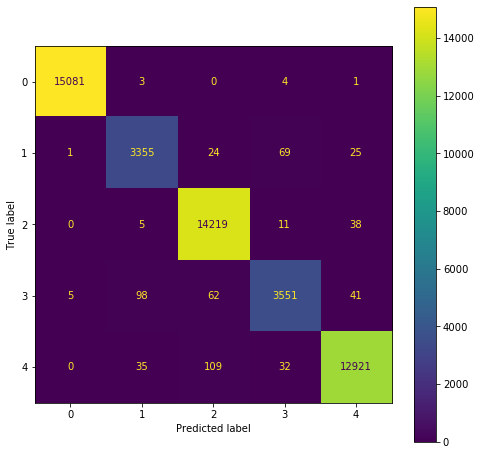

In [38]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(xgb,X_test,y_test,ax=ax,values_format='.6g')
plt.show()

In [39]:
accuracy_score(y_test,y_pred)

0.9886697524652848

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15089
           1       0.96      0.97      0.96      3474
           2       0.99      1.00      0.99     14273
           3       0.97      0.95      0.96      3757
           4       0.99      0.99      0.99     13097

    accuracy                           0.99     49690
   macro avg       0.98      0.98      0.98     49690
weighted avg       0.99      0.99      0.99     49690

